# Exploratory Data Analysis

preliminary analysis and visualizations

i'm using `plotly` for the visualizations; they're interactive but GitHub can't render them so i've included static renders

In [1]:
import pandas as pd
import plotly.express as px

### Download Bandwidth Usage 

In [2]:
df = pd.read_csv("../data/bandwidths.csv", parse_dates=["Timestamp"])
df_melted = df.melt(
    id_vars=["Timestamp"], 
    value_vars=df.columns.to_list()[1:], 
    var_name="Region", 
    value_name="Bandwidth",
)

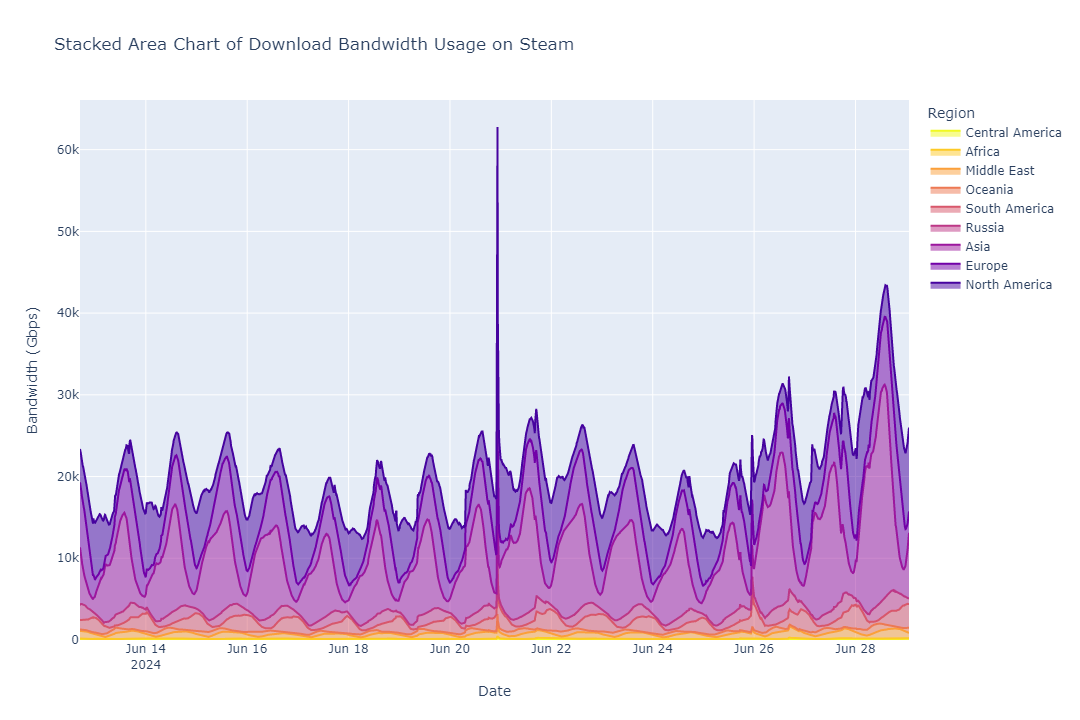

In [3]:
stacked = px.area(
    data_frame=df_melted, 
    x="Timestamp", 
    y="Bandwidth", 
    color="Region", 
    line_group="Region",
    labels={"Timestamp": "Date", "Bandwidth": "Bandwidth (Gbps)"},
    title="Stacked Area Chart of Download Bandwidth Usage on Steam",
    color_discrete_sequence=px.colors.sequential.Plasma_r,
    width=1080, 
    height=720,
)
# Uncomment for interactive plot
# stacked.show()
stacked.show("png")

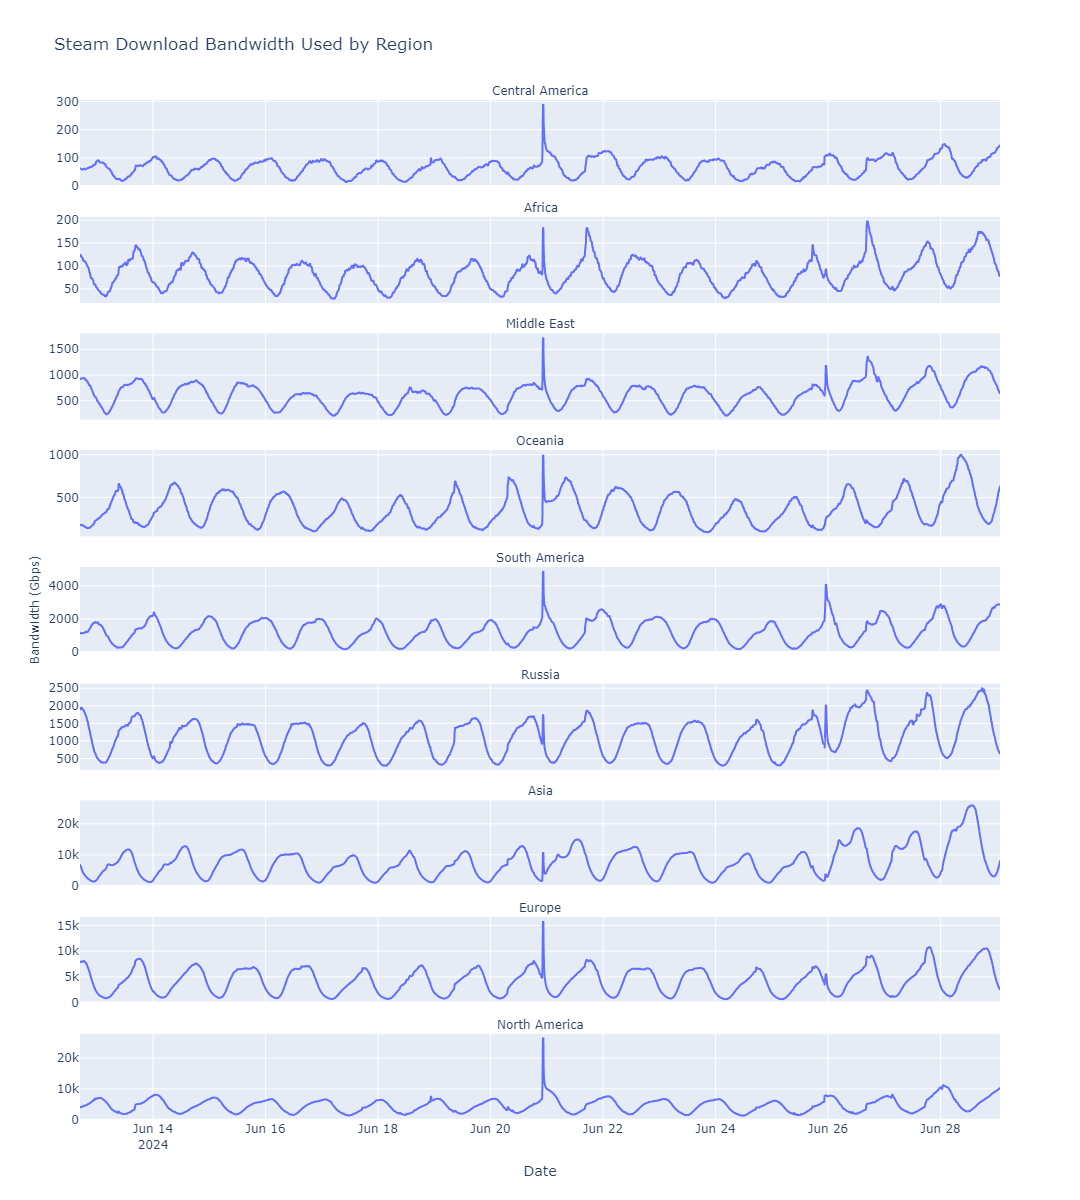

In [4]:
faceted = px.line(
    data_frame=df_melted,
    x="Timestamp",
    y="Bandwidth",
    facet_col="Region",
    facet_col_wrap=1,
    facet_row_spacing=0.03,
    labels={"Timestamp": "Date"},
    title="Steam Download Bandwidth Used by Region",
    width=1080,
    height=1200,
).update_yaxes(matches=None)

faceted.for_each_yaxis(lambda y: y.update({"title": ""}))
faceted.add_annotation(
    showarrow=False,
    xanchor='center',
    xref='paper', 
    x=-0.05, 
    yanchor='middle',
    yref='paper',
    y=0.5,
    textangle=270,
    text='Bandwidth (Gbps)'
)
faceted.for_each_annotation(lambda x: x.update(text=x.text.split("=")[-1]))

# Uncomment for interactive plot
# faceted.show()
faceted.show("png")

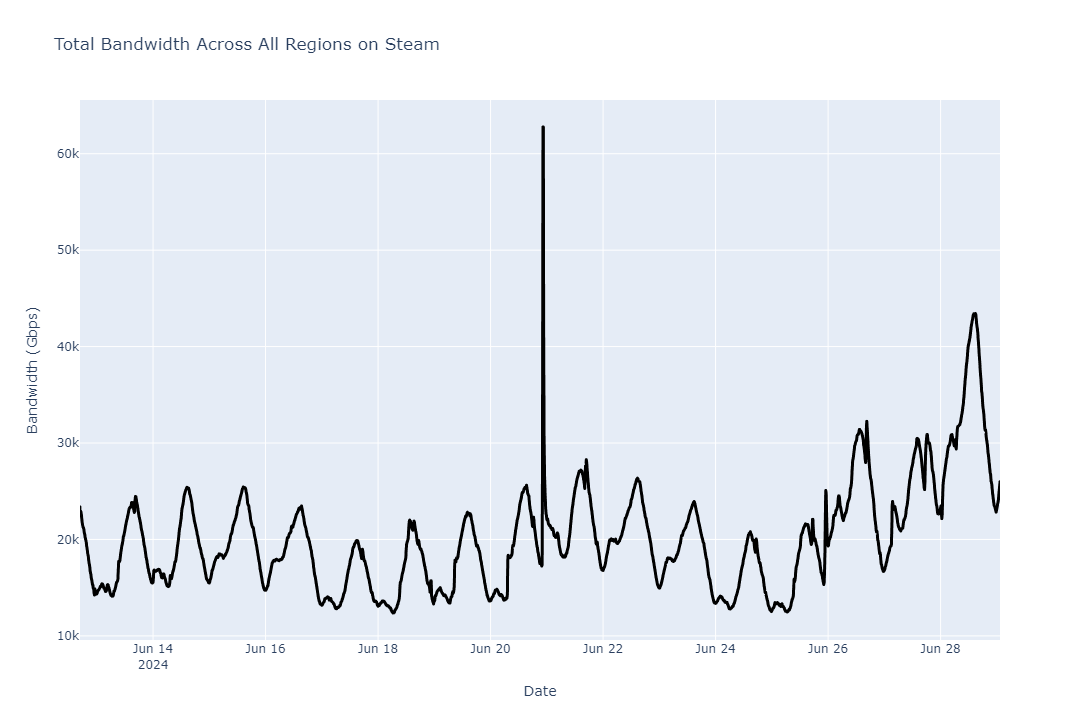

In [5]:
df_agg = pd.DataFrame()
df_agg["Timestamp"] = df["Timestamp"].copy()
df_agg["Total Bandwidth"] = df.sum(axis=1, numeric_only=True)

mean = df_agg["Total Bandwidth"].mean()
std = df_agg["Total Bandwidth"].std()

total = px.line(
    data_frame=df_agg,
    x="Timestamp",
    y="Total Bandwidth",
    labels={"Timestamp": "Date", "Total Bandwidth": "Bandwidth (Gbps)"},
    title="Total Bandwidth Across All Regions on Steam",
    width=1080,
    height=720,
).update_traces(
    line_color="black", 
    line_width=3
).update_layout(
    # yaxis_range=[mean - 2 * std, mean + 2.5 * std]
)
# Uncomment for interactive plot
# total.show()
total.show("png")

clear multiple seasonality present with weekly and daily patterns

there may be a yearly pattern as well but i don't have enough data as of writing this

### Support Requests

In [6]:
df2 = pd.read_csv("../data/support_requests.csv", parse_dates=["Timestamp"])
df2_melted = df2.melt(
    id_vars=["Timestamp"], 
    value_vars=df2.columns.to_list()[1:], 
    var_name="Request Status", 
    value_name="Support Requests",
)

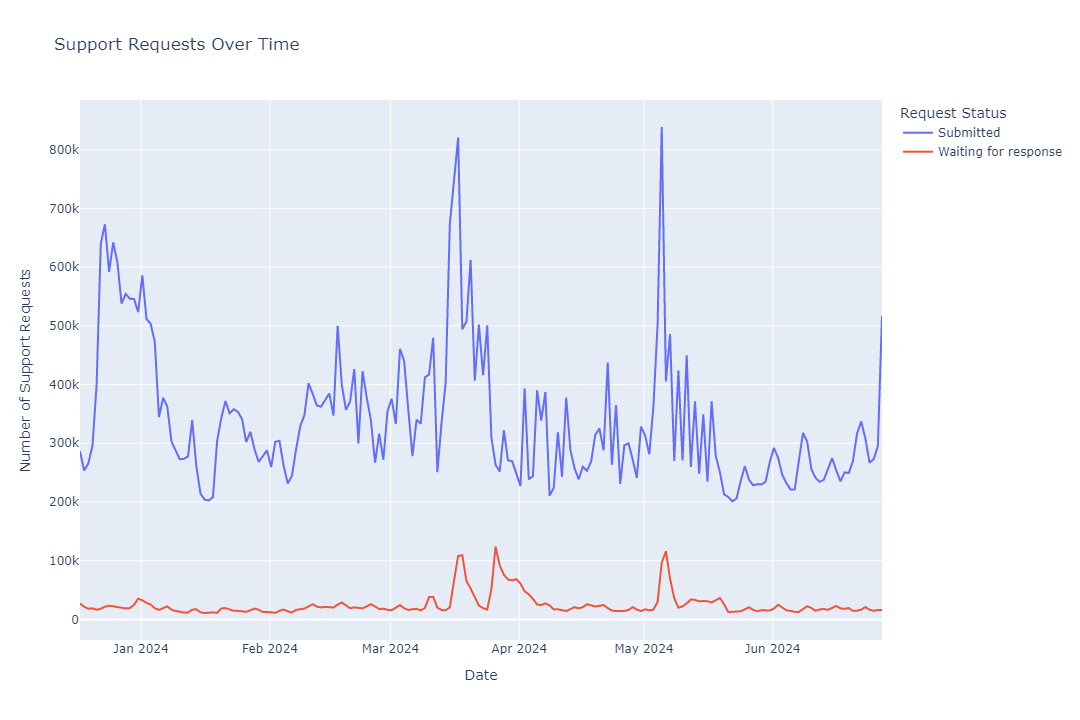

In [7]:
fig = px.line(
    data_frame=df2_melted,
    x="Timestamp",
    y="Support Requests",
    color="Request Status",
    labels={"Timestamp": "Date", "Support Requests": "Number of Support Requests"},
    title="Support Requests Over Time",
    width=1080,
    height=720,
)
# Uncomment for interactive plot
# fig.show()
fig.show("png")